In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Constants
FONTS = [cv2.FONT_HERSHEY_COMPLEX,
         cv2.FONT_HERSHEY_COMPLEX_SMALL,
         cv2.FONT_HERSHEY_DUPLEX,
         cv2.FONT_HERSHEY_PLAIN,
         cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
         cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
         cv2.FONT_HERSHEY_SIMPLEX,
         cv2.FONT_HERSHEY_TRIPLEX]
LINE_STYLES = [cv2.LINE_4,
               cv2.LINE_8,
               cv2.LINE_AA]

ASCII = R''' !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~'''
ASCII_REDUCE = R'''0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'''



In [113]:
def random_str(length):
    ascii_chars = [i for i in ASCII_REDUCE]
    ascii_chars_np = np.array(ascii_chars)
    string = np.random.choice(ascii_chars_np, length)
    return "".join(list(string))


def textnoise(img):
    n = np.random.randint(3,10)
    noise = img.copy()
    x, y = img.shape[0], img.shape[1]
    
    for i in range(n):
        string = random_str(np.random.randint(3,20))
        font = np.random.choice(FONTS)
        line_style = np.random.choice(LINE_STYLES)
        font_size = np.random.uniform(2,4)
        col= tuple(np.random.randint(0,255,3).astype(np.float64))
        thickness = np.random.randint(3,10)
        pos = (np.random.randint(0-x/100,x-x/25), np.random.randint(0-y/100,y-y/25))
        noise = cv2.putText(noise, string, pos, font, font_size, col, 3, line_style)
    
    return noise


def index_1d_to_2d(i, y):
    return i // y, i % y


def salt_pepper_noise(img, black_ratio=0.2, white_ratio=0.2):
    
    noise = img.copy()
    
    total = black_ratio + white_ratio
    x, y = img.shape[0], img.shape[1]
    
    indexes = np.random.choice(np.arange(x*y), size=int(total*x*y),
                               replace=False)
    b_indexes = np.random.choice(indexes, size=int(black_ratio*x*y),
                                 replace=False)
    w_indexes = np.random.choice(indexes, size=int(white_ratio*x*y),
                                 replace=False)
    
    vector_index = np.vectorize(lambda i: index_1d_to_2d(i, y))
    
    br, bc = vector_index(b_indexes)
    noise[br, bc] = np.array([0,0,0])
    wr, wc = vector_index(w_indexes)
    noise[wr, wc] = np.array([255,255,255])
    
    return noise

def random_colour():
    return np.random.randint(0,255,3)

def random_impulse_noise(img, ratio = 0.4):
    noise = img.copy()
    
    x, y = img.shape[0], img.shape[1]
    
    indexes = np.random.choice(np.arange(x*y), size=int(ratio*x*y),
                               replace=False)
    
    vector_index = np.vectorize(lambda i: index_1d_to_2d(i, y))
    
    r, c = vector_index(indexes)
    noise[r,c] = np.random.randint(0, 256, noise[r, c].shape)
#     print(noise[wr,wc])
    
    return noise
    


Text(0.5, 1.0, 'Salt & Pepper')

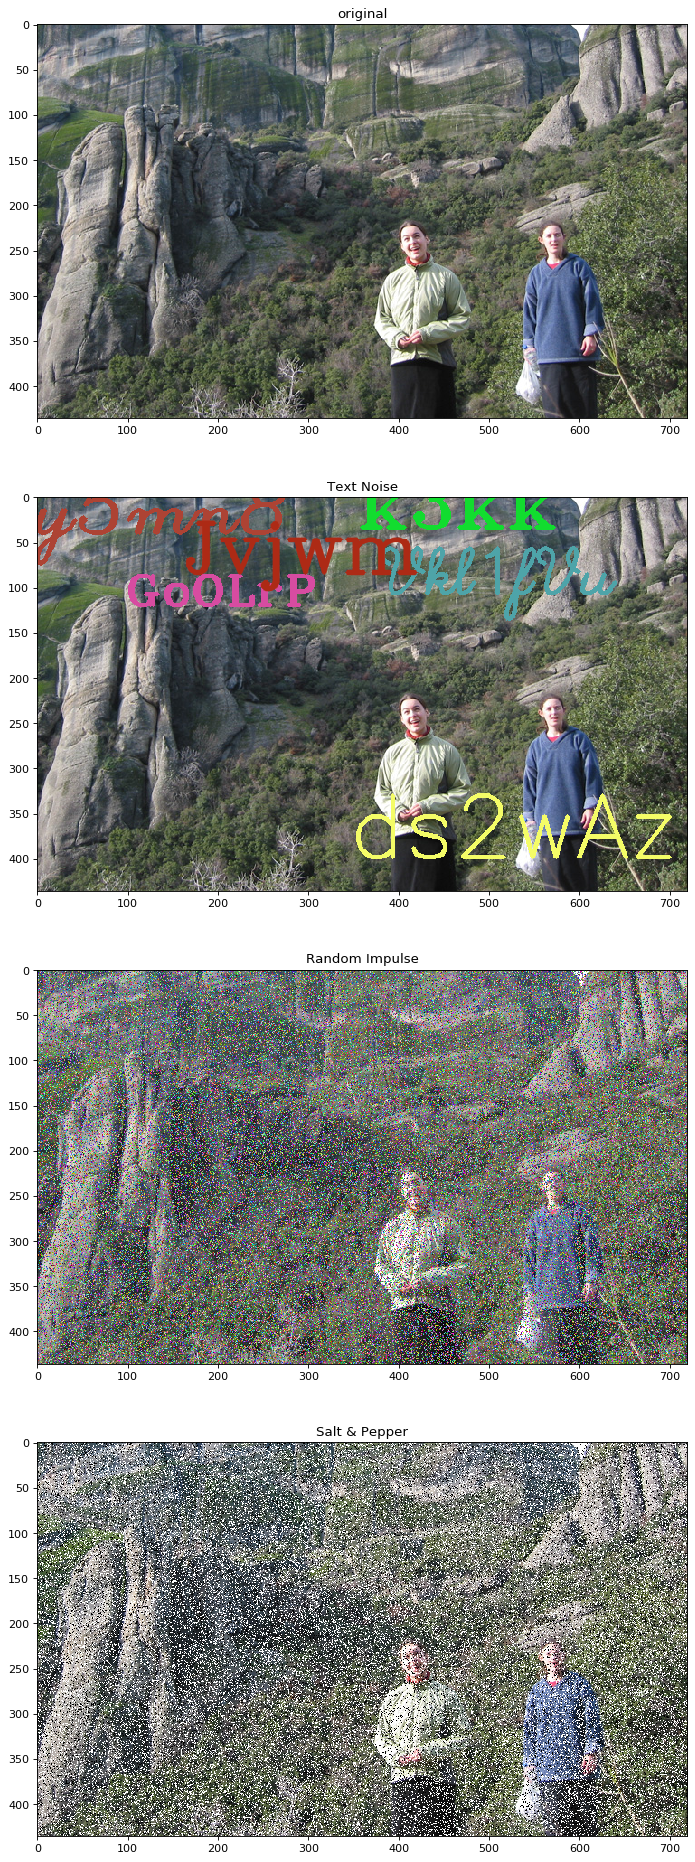

In [136]:
img = cv2.cvtColor(cv2.imread("../Dataset/kodak/kodim25.png"), cv2.COLOR_BGR2RGB)

img1 = textnoise(img)
img2 = random_impulse_noise(img)
img3 = salt_pepper_noise(img)


fig = plt.figure(figsize=(80, 30), dpi=80)
a = fig.add_subplot(4, 1, 1)
imgplot = plt.imshow(img)
a.set_title('original')

a = fig.add_subplot(4, 1, 2)
imgplot = plt.imshow(img1)
a.set_title('Text Noise')

a = fig.add_subplot(4, 1, 3)
imgplot = plt.imshow(img2)
a.set_title('Random Impulse')

a = fig.add_subplot(4, 1, 4)
imgplot = plt.imshow(img3)
a.set_title('Salt & Pepper')


In [108]:
random_str(10)
# plt.imshow(img)

array(['v', '\\', 'V', '&', 'v', 'R', 'x', 'Y', 'R', 'V'], dtype='<U1')